## Introduction
This notebook does EDA on the dataset available [here](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) and then predict whether an individual is prone to heart attack. It's a classification task and classifiers like Logistic Regression, Decision Tree and Random Forest are used for prediction.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Load input data

In [2]:
df = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Work while considering this csv file is due :( I will be working on it and will release in future version of the notebook.
odf = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
odf.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print("heart df shape: ", df.shape)
print("O2 saturation df shape: ", odf.shape)

heart df shape:  (303, 14)
O2 saturation df shape:  (3585, 1)


### 1.1 Fields of 'df'

> 

    age      : Age of the patient

    sex      : Sex of the patient
    
    cp       : Chest Pain type
                typical angina (= 0)
                atypical angina (= 1)
                non-anginal pain (= 2)
                asymptomatic (= 3)
            
    trtbps   : Resting blood pressure (in mm Hg) 
    
    chol     : Cholestoral in mg/dl fetched via BMI sensor             # mg/dl --> "milligram per decilitre"
    
    fbs      : (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    restecg  : Resting electrocardiographic results
                normal (= 0)
                having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (= 1)
                showing probable or definite left ventricular hypertrophy by Estes' criteria (= 2)
                
    thalachh : Maximum heart rate achieved          
    
    oldpeak  : Previous peak
    
    slp      : Slope

    exng     : Exercise induced angina (1 = yes; 0 = no)
    
    thall    : Thalium stress test result (0-3)

    caa      : Number of major vessels (0-3)
    
    output   : 0 = less chance of heart attack, 1 = more chance of heart attack

[](http://)

## 2. EDA

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

> Hoorey! no missing values. That's rare but reduces your time.

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.1 CountPlots for various categorical features

Text(0, 0.5, '')

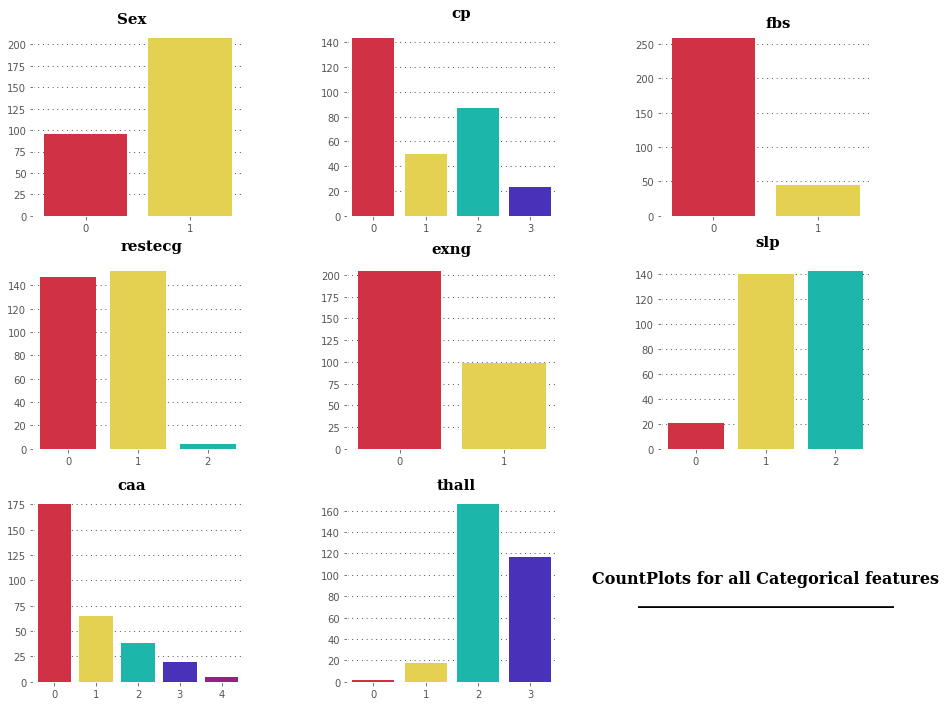

In [8]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.25)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax0 = fig.add_subplot(gs[2, 2])                                       ## For setting up title for plots

back_color = '#0000'
col_palette = ['#eb1730', '#fce238', '#04cfc1', '#3c1bcf', '#b8068b']
fig.patch.set_facecolor(back_color)
ax0.set_facecolor(back_color)
ax1.set_facecolor(back_color)
ax2.set_facecolor(back_color)
ax3.set_facecolor(back_color)
ax4.set_facecolor(back_color)
ax5.set_facecolor(back_color)
ax6.set_facecolor(back_color)
ax7.set_facecolor(back_color)
ax8.set_facecolor(back_color)

font0 = {'family': 'serif', 'weight': 'bold', 'size': 16, 'color': 'k'}

# Set title for the plots
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, "CountPlots for all Categorical features\n________________________________",
         horizontalalignment='center', verticalalignment='center', 
         fontdict=font0)

font = {'family': 'serif', 'weight': 'bold', 'size': 15, 'color': 'k'}

# 'sex' count
ax1.text(0.3, 225, 'Sex', fontdict=font)
ax1.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='sex', data=df, ax=ax1, palette=col_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# 'cp' count
ax2.text(1.5, 160, 'cp', fontdict=font)
ax2.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='cp', data=df, ax=ax2, palette=col_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# 'fbs' count
ax3.text(0.5, 275, 'fbs', fontdict=font)
ax3.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='fbs', data=df, ax=ax3, palette=col_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# 'restecg' count
ax4.text(0.75, 170, 'restecg', fontdict=font)
ax4.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='restecg', data=df, ax=ax4, palette=col_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# 'exng' count
ax5.text(0.3, 225, 'exng', fontdict=font)
ax5.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='exng', data=df, ax=ax5, palette=col_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# 'slp' count
ax6.text(0.85, 162, 'slp', fontdict=font)
ax6.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='slp', data=df, ax=ax6, palette=col_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# 'caa' count
ax7.text(1.5, 190, 'caa', fontdict=font)
ax7.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='caa', data=df, ax=ax7, palette=col_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# 'thall' count
ax8.text(1.2, 180, 'thall', fontdict=font)
ax8.grid(color='k', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.countplot(x='thall', data=df, ax=ax8, palette=col_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

### 2.2 Correlation matrix

In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
cont_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
corr_df = df[cont_features].corr()
corr_df

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


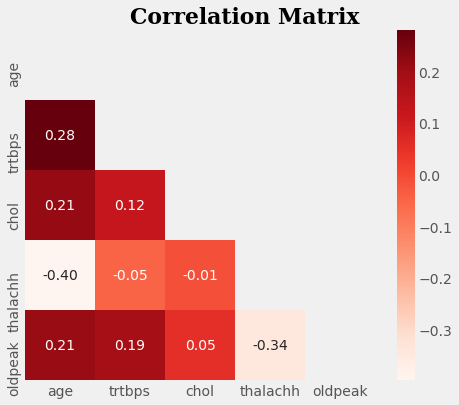

In [11]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(7, 6))
gs = fig.add_gridspec(nrows=1, ncols=1)
gs.update(wspace=0.3, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

# col_palette = ['#1f1f5c', '#65dba6']
mask = np.triu(np.ones_like(corr_df))
font = {'family': 'serif', 'weight': 'bold', 'size': 22, 'color': 'k'}
ax0.text(1.5, -0.1, "Correlation Matrix", fontdict=font)

sns.heatmap(corr_df, fmt='0.2f', mask=mask, cmap='Reds', annot=True)
plt.show()

### 2.3 'age' field

In [12]:
# Age groups (prone to heart attack)
age_group1 = df.loc[(df['age']<40) & (df['output']==1), 'age'].count()
age_group2 = df.loc[((df['age']>=40) & (df['age']<55)) & (df['output']==1), 'age'].count()
age_group3 = df.loc[((df['age']>=55) & (df['age']<70)) & (df['output']==1), 'age'].count()
age_group4 = df.loc[(df['age']>=70) & (df['output']==1), 'age'].count()

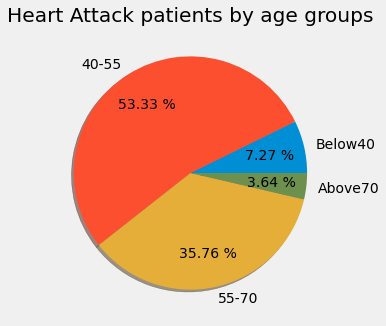

In [13]:
age_groups = np.array([age_group1, age_group2, age_group3, age_group4])
labels = ['Below40', '40-55', '55-70', 'Above70']

plt.figure(figsize=(5, 5))
plt.style.use("fivethirtyeight")
plt.pie(x=age_groups, labels=labels, autopct='%0.2f %%', pctdistance=0.7, shadow=True)
plt.title("Heart Attack patients by age groups")
plt.show()

> So it's clear from the above chart that the people in the age group 40-55 are most prone to heart attack followed by those in the age group 55-70

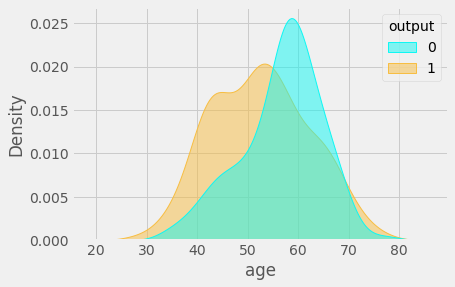

In [14]:
# Distribution of 'Age' according to 'output'
sns.kdeplot(x='age', hue='output', data=df, fill=True, alpha=0.5, palette=['#0ff7f3', '#f7be43'], linewidth=1)
plt.show()

> The kde plot also agrees with the above pie chart that in the age between 40 & 55, chances are more of being prone to heart attack.

### 2.4 'sex' field

In [15]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

> It seems like value '0' means female and '1' means male

In [16]:
male = df.loc[(df['sex']==1) & (df['output']==1), 'sex'].count()
female = df.loc[(df['sex']==0) & (df['output']==1), 'sex'].count()

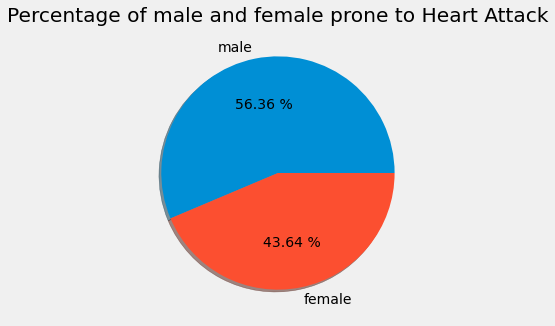

In [17]:
gender_group = np.array([male, female])
labels = ['male', 'female']

plt.figure(figsize=(5, 5))
plt.style.use("fivethirtyeight")
plt.pie(x=gender_group, labels=labels, autopct='%0.2f %%', shadow=True)
plt.title("Percentage of male and female prone to Heart Attack")
plt.show()

> Out of all those who had heart attack, majority were male patients. But the difference between the two is not large. 

In [18]:
print("Chances of Male prone to heart attack (in train data) = {}%".format((male/207)*100))
print("Chances of female prone to heart attack (in train data) = {}%".format((female/96)*100))

Chances of Male prone to heart attack (in train data) = 44.927536231884055%
Chances of female prone to heart attack (in train data) = 75.0%


### 2.5 'cp' field

> It denotes Chest Pain, which is symptom of Cardiovascular diseases. Refer section 1.1 to know the categories.

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

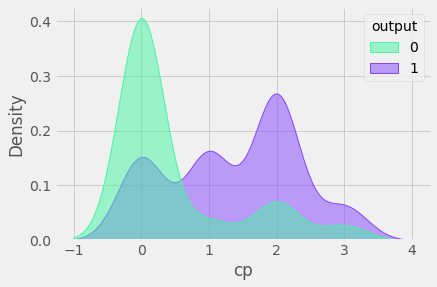

In [21]:
# Distribution plot of 'cp'
sns.kdeplot(x='cp', hue='output', data=df, alpha=0.5, fill=True, palette=['#45f5a3', '#8645ff'], linewidth=1)
plt.show()

> The plot depicts that those with *typical angina* are surviving more in number from heart attack. While those who had *atypical*, *non-anginal* or *asymptomatic* chest pain were more prone to heart attack.
> Since it's a categorical variable, we only look at peaks and dips.

### 2.6 'trtbps' field

> Normal/Resting blood pressure is systolic of less than 120 and diastolic of less than 80 (120/80 mmHg).

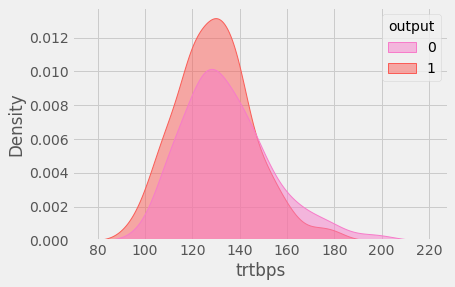

In [22]:
sns.kdeplot(x='trtbps', hue='output', data=df, alpha=0.5, palette=['#f77cca', '#fa5d57'], fill=True, linewidth=1)
plt.show()

> There is uncertainity in what value or range of values can or cannot cause heart attack. But still, a value greater than 180 will be a safer side.

### 2.7 'chol' field

> Cholesterol level must be a major indicator to whether someone is prone to heart attack or not.

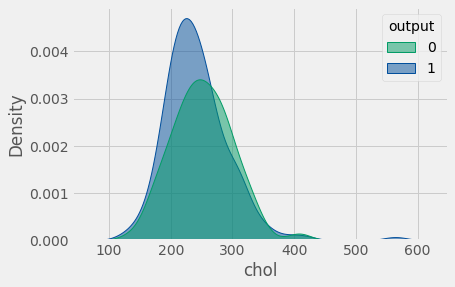

In [23]:
sns.kdeplot(x='chol', hue='output', data=df, alpha=0.5, fill=True, palette=['#029c66', '#024f9c'], linewidth=1)
plt.show()

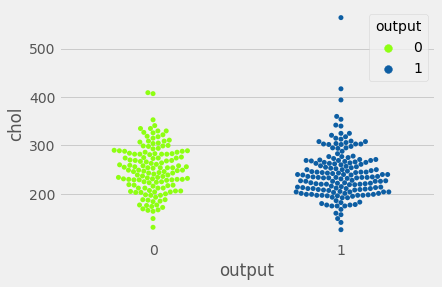

In [24]:
sns.swarmplot(x='output', y='chol', hue='output', data=df, palette=['#8eff12', '#0d5ea3'])
plt.show()

In [25]:
# The 2 green outliers
df.loc[(df['chol']>400) & (df['output']==0), :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [26]:
# The 3 blue outliers
df.loc[(df['chol']>390) & (df['output']==1), :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [27]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [28]:
print(df['output'].value_counts())
print("Average cholesterol level of those who had heart attack", df.loc[df['output']==1, 'chol'].mean())
print("Average cholesterol level of the rest", df.loc[df['output']==0, 'chol'].mean())

1    165
0    138
Name: output, dtype: int64
Average cholesterol level of those who had heart attack 242.23030303030302
Average cholesterol level of the rest 251.08695652173913


> The results are bit surprising! A good cholesterol level is 200 or below, 200-239 is moderately elevated (seen from a health related site). But the entire dataset 'chol' average is ~246. And even more surprising is the fact that heart attack patients had lower average cholesterol level than those who didn't have heart attack!

> I think less amount of data is the problem here. Heart attack is one of the top diseases worldwide. ~17.9M people died due to Cardiovascular diseases in 2019, out of which 85% were due to heart attack or stroke (WHO).

### 2.8 'fbs' field

*Fasting blood sugar* is tested after an overnight fast and before breakfast. A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

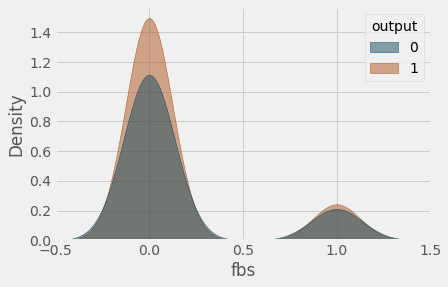

In [29]:
sns.kdeplot(x='fbs', hue='output', data=df, alpha=0.5, fill=True, palette=['#164b61', '#ad561f'])
plt.show()

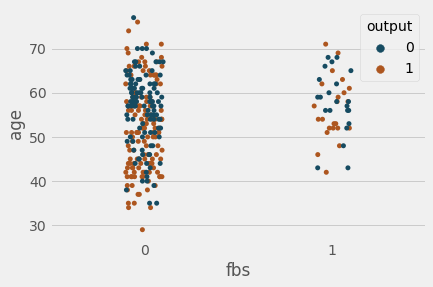

In [30]:
sns.stripplot(x='fbs', y='age', hue='output', data=df, palette=['#164b61', '#ad561f'])
plt.show()

> Only one thing I'm able to get here is that even without *'fbs'* (majority), people are having heart attack! Would appreciate your comments.

### 2.9 'restecg' field

*Resting Electrocardiogram Wave results* of the patient.

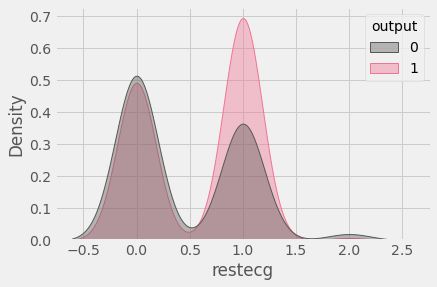

In [31]:
sns.kdeplot(x='restecg', hue='output', data=df, alpha=0.4, fill=True, palette=['#575955', '#f07594'], linewidth=1)
plt.show()

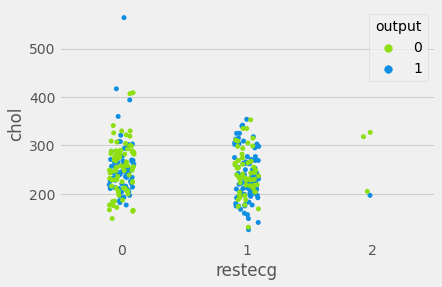

In [32]:
sns.stripplot(x='restecg', y='chol', data=df, hue='output', palette=['#8edf12', '#0d8ee3'])
plt.show()

> Green points are just more than blue ones for *'restecg' = 0*, while for *'restecg' = 1*, blue points are more in number. There are very less cases where *'restecg' = 2*.

### 2.10 'thalachh' field

> *Maximum Heart rate achieved* in the electrocariogram of the patient.

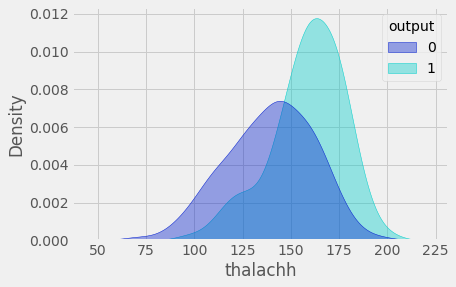

In [33]:
sns.kdeplot(x='thalachh', hue='output', data=df, fill=True, alpha=0.4, palette=['#0621cf', '#06cfcb'])
plt.show()

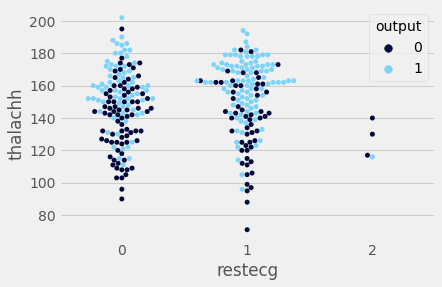

In [34]:
sns.swarmplot(x='restecg', y='thalachh', hue='output', data=df, palette=['#01093b', '#7dd4fa'])
plt.show()

> When *'thalachh'*, i.e., max heart achieved is reaching 160+, more points can be seen for *output* being 1. And those points are more distributed for *'restecg' = 1* (i.e. when there is ST-T wave abnormality in patient). Also notice that this can be seen in above kdeplot also. So we can say that 160 can be taken as threshold for max heart rate.

### 2.11 'exng' field

*Exercise induce angina*, i.e., whether the chest pain is due to exercise.

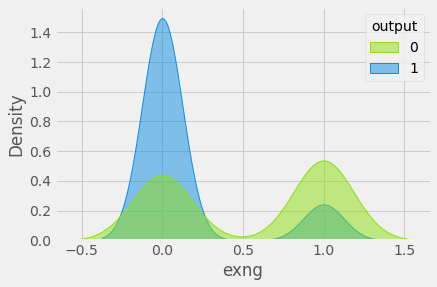

In [35]:
sns.kdeplot(x='exng', hue='output', data=df, alpha=0.5, fill=True, palette=['#8edf12', '#0d8ee3'], linewidth=1)
plt.show()

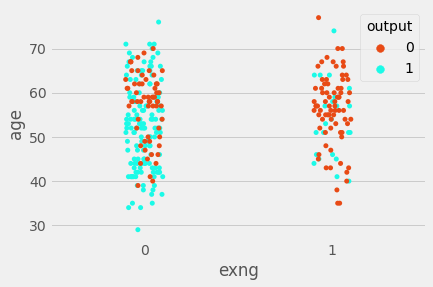

In [36]:
sns.stripplot(x='exng', y='age', data=df, hue='output', palette=['#e84a15', '#1bfae7'])
plt.show()

* Not *'exercise induced angina'*: age 55+ -> ~45% were not prone to heart attack, while those with age below 55 -> most of them had heart attack
* The angina was due to exercise-> most of them were not prone to heart attack
* The above 2 visualizations tell that angina not due to exercise are more dangerous for heart diseases

### 2.12 'oldpeak' field

> Previous peak in the heart rate of the patient.

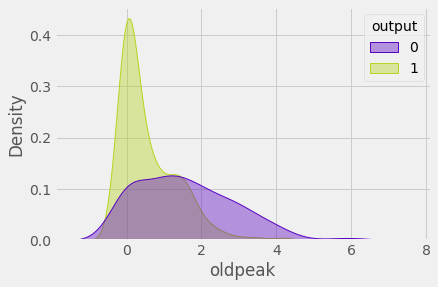

In [37]:
sns.kdeplot(x='oldpeak', hue='output', data=df, alpha=0.4, fill=True, palette=['#5904c2', '#b6d420'], linewidth=1)
plt.show()

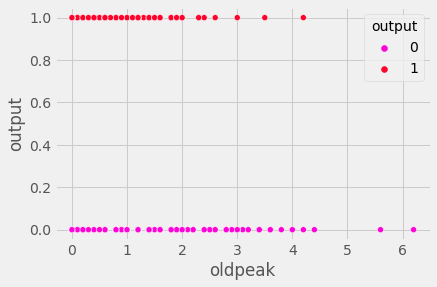

In [38]:
sns.scatterplot(x='oldpeak', y='output', hue='output', data=df, palette=['#fc03d7', '#fc032c'])
plt.show()

> The above two plots tell that if *oldpeak* is >= 3, then there are less chances of having heart attack. And if it's <= 2, then there are high chances of having heart attack.

### 2.13 'slp' field

> I think it's the slope of the *QRS Complex* (or the ST-T wave in it) recorded in the electrocardiogram.

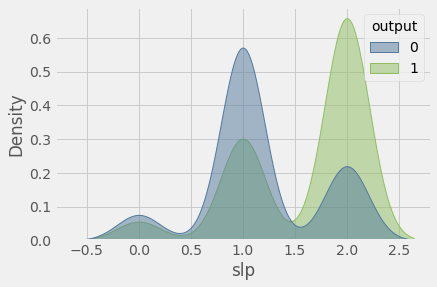

In [39]:
sns.kdeplot(x='slp', hue='output', data=df, alpha=0.5, fill=True, palette=['#517a9e', '#90bf62'], linewidth=1)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


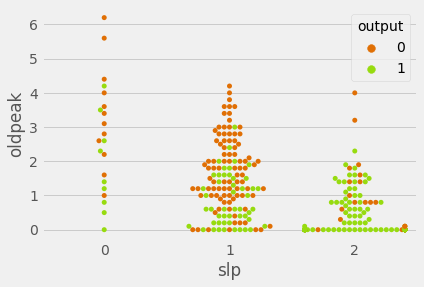

In [40]:
sns.swarmplot(x='slp', y='oldpeak', hue='output', data=df, palette=['#e06f04', '#97db0f'])
plt.show()

* First thing I noticed is that when *'slp'=2* **and** *'oldpeak'<2*, most points are green(i.e. heart attack cases). And the scatterplot for oldpeak in the previous section also agrees on it.
* Secondly, for any value of *'slp'*, for *'oldpeak'>=3* most points are corresponding to *'output'=0*(i.e. not a heart attack case).
* For *'slp'=1* **and** *'oldpeak'<3*, there are ~50:50 chances of *'output'* being 0 or 1.

### 2.14 'caa' field

> Number of major vessels

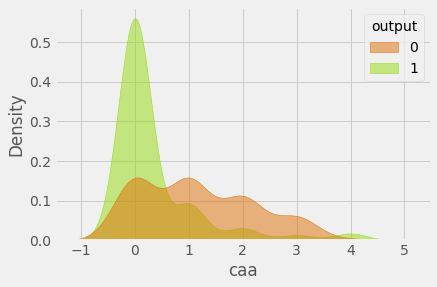

In [41]:
sns.kdeplot(x='caa', hue='output', data=df, fill=True, alpha=0.5, palette=['#e06f04', '#97db0f'])
plt.show()

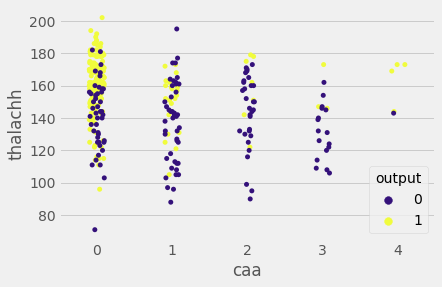

In [42]:
sns.stripplot(x='caa', y='thalachh', hue='output', data=df, palette=['#34117a', '#f0fc3d'])
plt.show()

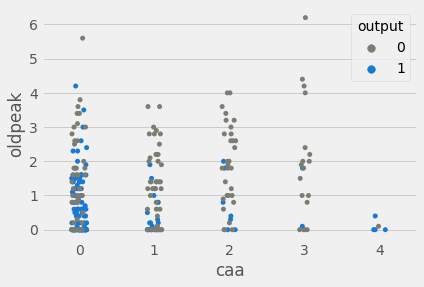

In [43]:
sns.stripplot(x='caa', y='oldpeak', hue='output', data=df, palette=['#7c7d72', '#1779d4'])
plt.show()

* As number of major vessels increase, risk of heart attack decreases (*'caa'=4* is exception). If *'caa'=0*, risk of heart attack is high.
* Even if *'caa'=0*, people with *'thalachh'<160* **and** *'oldpeak'>=3* have higher chances of not having heart attack as compared to others.

### 2.15 'thall' field

> Thallium stress test results tell you about the flow of blood to your heart through coronary arteries.  An abnormal test result can reveal coronary blockages as well as damage from heart attacks.

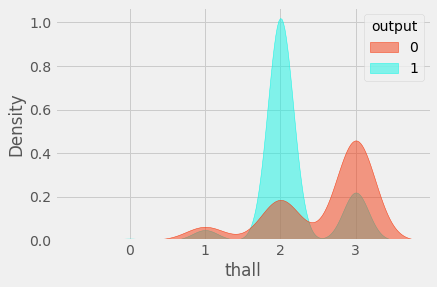

In [44]:
sns.kdeplot(x='thall', hue='output', data=df, fill=True, alpha=0.5, palette=['#f53b11', '#11f5e6'])
plt.show()

* If the patient's thallium stress test result is of category '2', then that means chances are very high that the patient is prone to or had heart attack.

## 3. Import classifiers and other packages

In [45]:
# For scaling continuous features
from sklearn.preprocessing import RobustScaler

# To divide dataset into training and test set
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score

# Cross Validation
from sklearn.model_selection import cross_val_score

### 3.1 Scaling and defining features and target 

In [46]:
# Make a copy of 'df'
df1 = df

# Convert categorical variables into dummy variables
cat_features = ['sex','cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
df1 = pd.get_dummies(data=df1, columns=cat_features, drop_first=True)

# Define X and y for training
X = df1.drop(['output'], axis=1)
y = df1[['output']]

# Instantiate scaler
scaler = RobustScaler()

# Scale the continuous feature
X[cont_features] = scaler.fit_transform(X=X[cont_features])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 3.2 Splitting dataset

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### 3.3 Building and training model

#### 3.3.1 Logistic Regression

In [49]:
# Train the model using LR
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [50]:
# Calculating probabilities
lr_pred_proba = lr.predict_proba(X_test)

# Prediction
lr_pred = np.argmax(lr_pred_proba, axis=1)

# Accuracy of the model
print("Accuracy of the LogisticRegression model is", accuracy_score(y_test, lr_pred))

Accuracy of the LogisticRegression model is 0.9016393442622951


#### 3.3.2 Decision Tree classifier

In [51]:
# Make classifier's object and fit the model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Make prediction and check model's accuracy
tree_pred = tree.predict(X_test)
print("Accuracy of the Decision Tree Classifier is", accuracy_score(y_test, tree_pred))

Accuracy of the Decision Tree Classifier is 0.7540983606557377


#### 3.3.3 Random Forest Classifier

In [53]:
# Make its object and train
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [54]:
rf_pred = rf.predict(X_test)
print("Accuracy of the Random Forest Model is", accuracy_score(y_test, rf_pred))

Accuracy of the Random Forest Model is 0.8524590163934426


> This notebook is still incomplete in the current version. I will release its fully completed version soon. Thanks for visiting :)